# Name: Ahmad Ossama Ahmad

# The Sparks Foundation Data Science & Business Analytics Internship

## Task 4 - Explanatory Data Analysis (Terrorism)

## Goals:
## - Try to find out the hot zone of terrorism as a security/defense analyst
## - Derive security issues and insights by EDA

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Loading and Reading Dataset

In [2]:
#url = 'https://bit.ly/2TK5Xn5'
df = pd.read_csv('globalterrorismdb_0718dist.csv')

In [3]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape

(181691, 135)

### Analyze statistics of Numerical Data

In [5]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


# Check sum of the null values.

In [6]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

Many columns are found so we cannot detect all columns with nan values.

In [7]:
# Check number of duplicate values and remove them if any
df.duplicated().sum() 

0

#### The number of columns is still to many so we will reduce them into the important ones for our data

In [8]:
df = df[['iyear','imonth','iday','country_txt','provstate','region_txt','city','latitude','longitude','attacktype1_txt','nkill',
       'nwound','target1','summary','gname','targtype1_txt','weaptype1_txt','motive']]

In [9]:
df.head(5)

,iyear,imonth,iday,country_txt,provstate,region_txt,city,latitude,longitude,attacktype1_txt,nkill,nwound,target1,summary,gname,targtype1_txt,weaptype1_txt,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   provstate        181270 non-null  object 
 5   region_txt       181691 non-null  object 
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   attacktype1_txt  181691 non-null  object 
 10  nkill            171378 non-null  float64
 11  nwound           165380 non-null  float64
 12  target1          181055 non-null  object 
 13  summary          115562 non-null  object 
 14  gname            181691 non-null  object 
 15  targtype1_txt    181691 non-null  object 
 16  weaptype1_txt    181691 non-null  obje

### Displaying the most repeated attacks at the following columns

In [11]:
print("Region with the most attacks:",df['region_txt'].value_counts().idxmax())
print("Year with the most attacks:",df['iyear'].value_counts().idxmax())
print("Month with the most attacks:",df['imonth'].value_counts().idxmax())
print("Country with the most attacks:",df['country_txt'].value_counts().idxmax())
print("State with the most attacks:",df['provstate'].value_counts().idxmax())
print("Most Attack Types:",df['attacktype1_txt'].value_counts().idxmax())
print("Target most Attacked:",df['target1'].value_counts().idxmax())


Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Country with the most attacks: Iraq
State with the most attacks: Baghdad
Most Attack Types: Bombing/Explosion
Target most Attacked: Civilians


In [12]:
df['iyear'].value_counts(dropna=False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: iyear, dtype: int64

## Data Visualizations

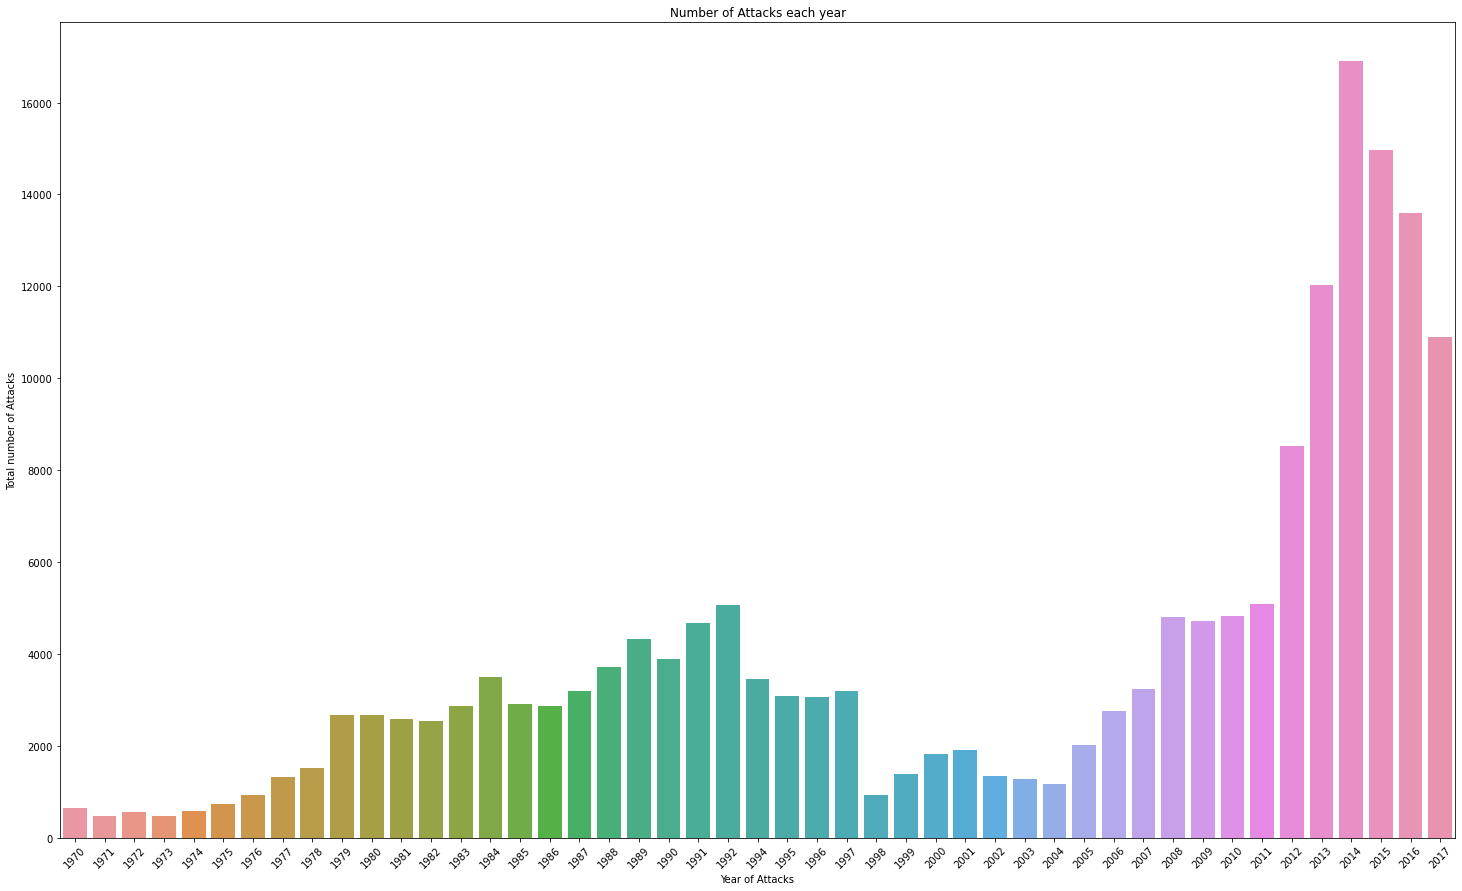

In [13]:
plt.figure(figsize=(25,15))
sns.countplot(x = df['iyear'])
plt.xlabel('Year of Attacks')
plt.ylabel('Total number of Attacks')
plt.title('Number of Attacks each year')
plt.xticks(rotation = 45)
plt.show()

From the shown graph, year 2014 and 2015 have the most atacks since 1970 and year 2012 was the starting point of a huge increase in number of attacks from (5000 to 8000)

In [14]:
#Fill null values of wounded and killed numbers with 0 as default
df['nwound'] = df['nwound'].fillna(0)
df['nkill'] = df['nkill'].fillna(0)

In [15]:
df['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

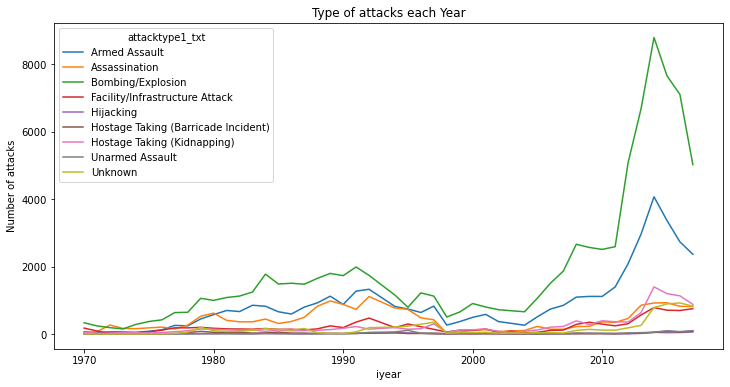

In [16]:
pd.crosstab(df['iyear'], df['attacktype1_txt']).plot(figsize=(12,6))
plt.title('Type of attacks each Year')
plt.ylabel('Number of attacks')
plt.show()

### Computing number of kills for each attack type

In [17]:
attacks = df.loc[:,'attacktype1_txt']
kills = df.loc[:,'nkill']

typeOfKill = pd.concat([attacks, kills], axis=1)

In [18]:
typeKills = typeOfKill.pivot_table(columns='attacktype1_txt', values = 'nkill', aggfunc='sum')
typeKills

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


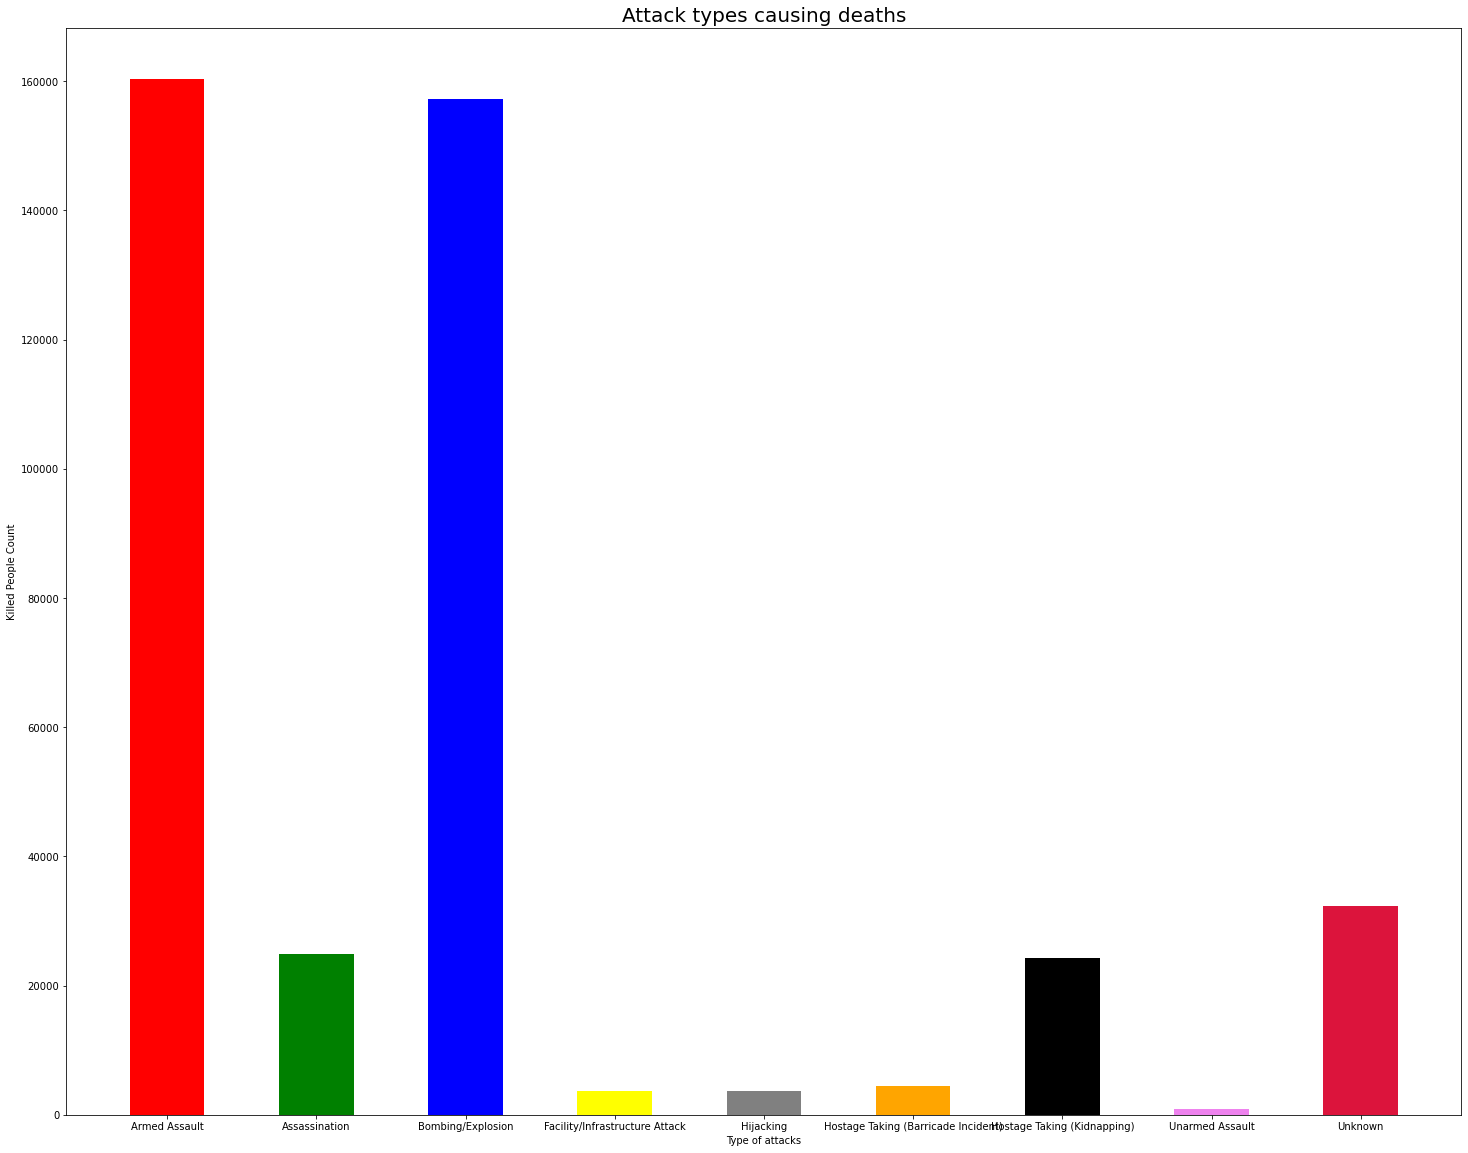

In [19]:
labels = typeKills.columns.tolist()
index = np.arange(len(labels))
values = typeKills.T.values.tolist()
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'yellow','gray', 'orange','black', 'violet','crimson']
plt.rcParams["figure.figsize"] = (25,20)
plt.bar(index, values, color = colors, width = 0.5)
plt.ylabel('Killed People Count')
plt.xlabel('Type of attacks')
plt.xticks(index, labels)
plt.title('Attack types causing deaths', fontsize = 20)
plt.show()

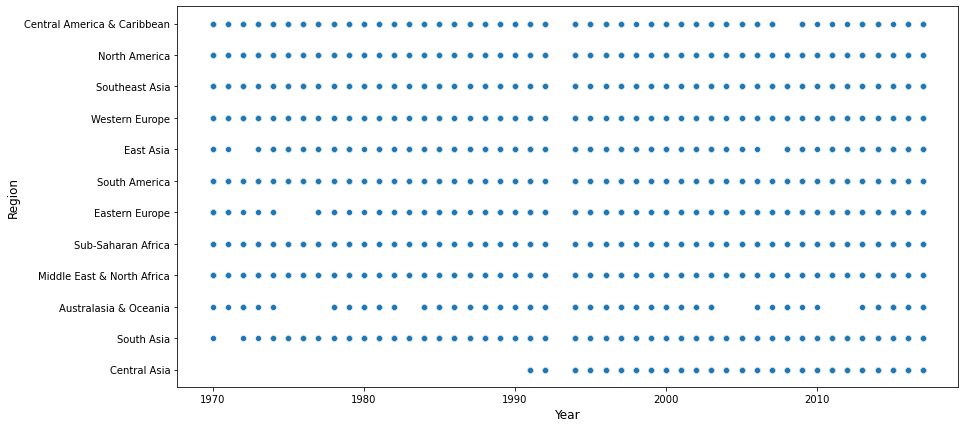

In [20]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='iyear', y='region_txt', data = df)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Region',fontsize=12)
plt.show()

#### This scatter plot shows that Central Asia Region did not have any attacks until 1990s. Then number of attacks started to grow to become one of the highest regions.

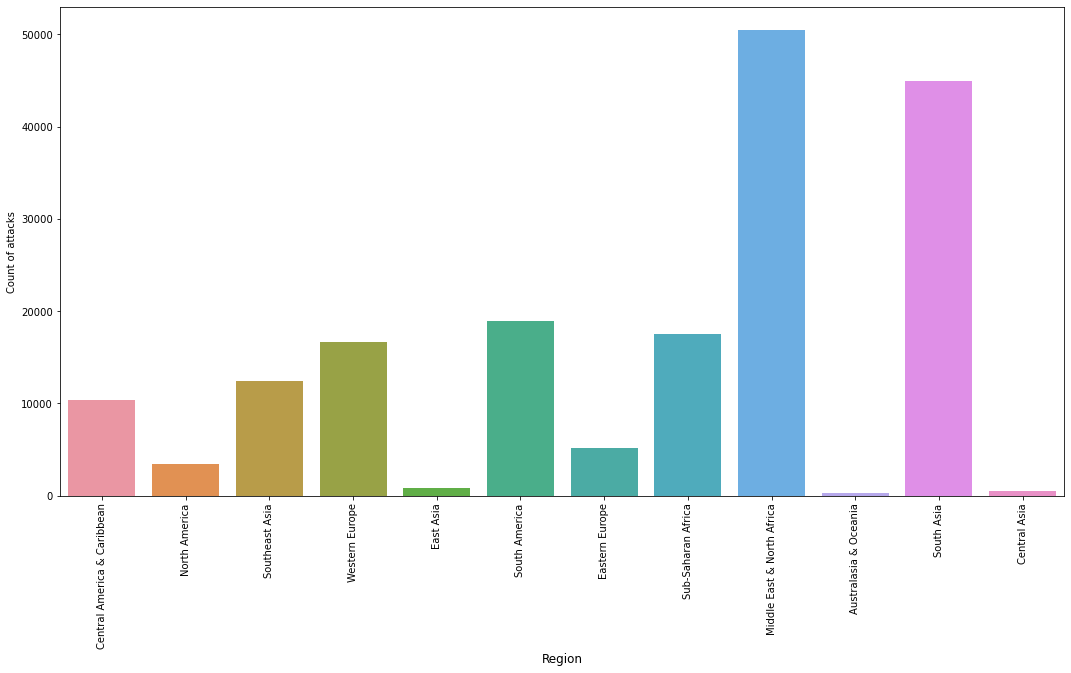

In [21]:
plt.figure(figsize=(18,9))
sns.countplot(x = 'region_txt', data = df)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation = 'vertical')
plt.ylabel('Count of attacks')
plt.show()

In [22]:
df['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

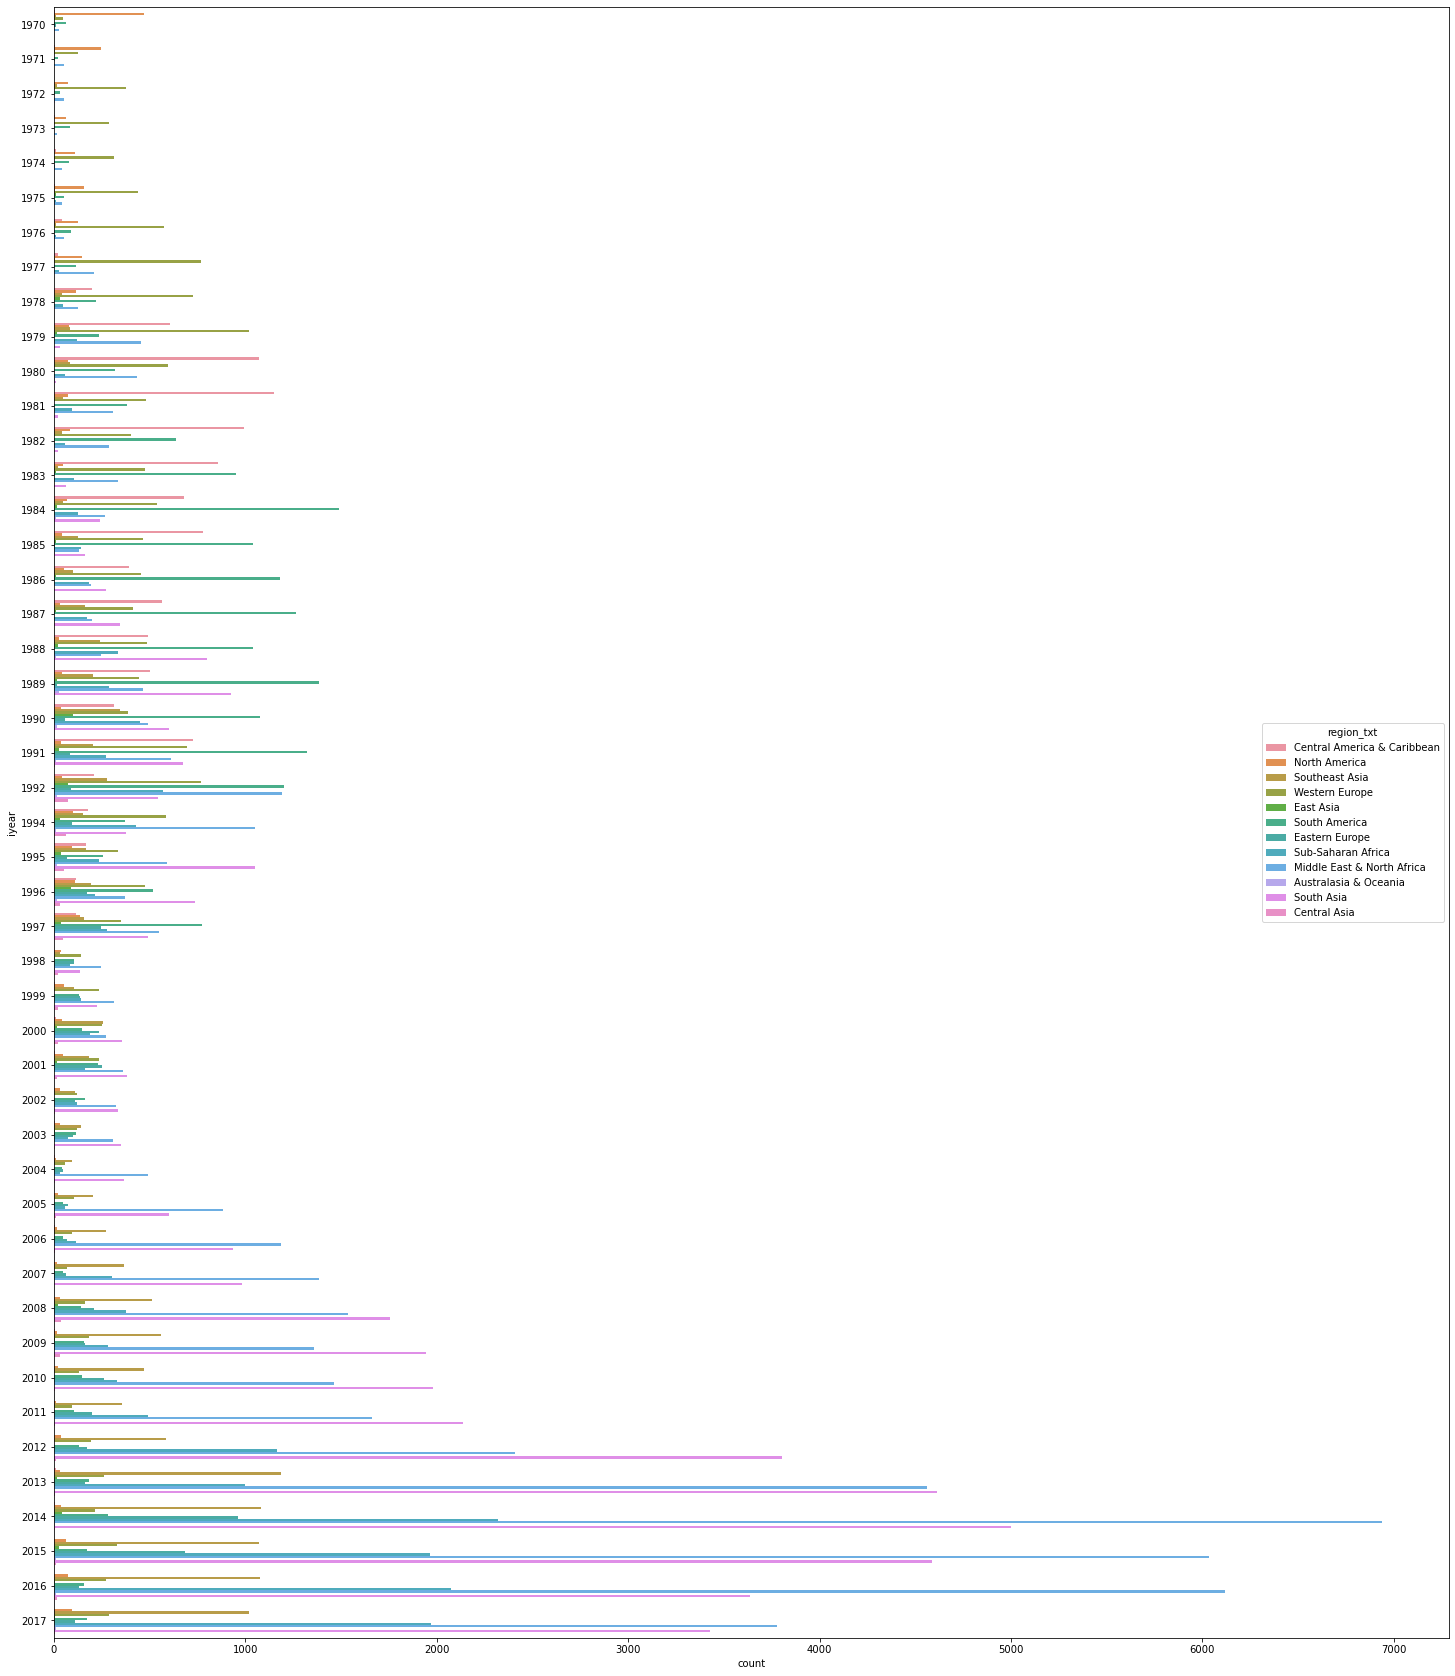

In [23]:
#sns.barplot(x='iyear',y='tip', data=data,  hue='sex')
plt.figure(figsize=(25,30))
sns.countplot(y ='iyear', data = df, hue='region_txt',orient='h')
plt.show()

#### From the graph and the scatter plot, central Asia region was not a target of attacks until 1990. After that, number of attacks increased gradually until it became the third highest attacks target after Middle East and North Africa

In [24]:
highest_countries = df['country_txt'].value_counts()[:15]

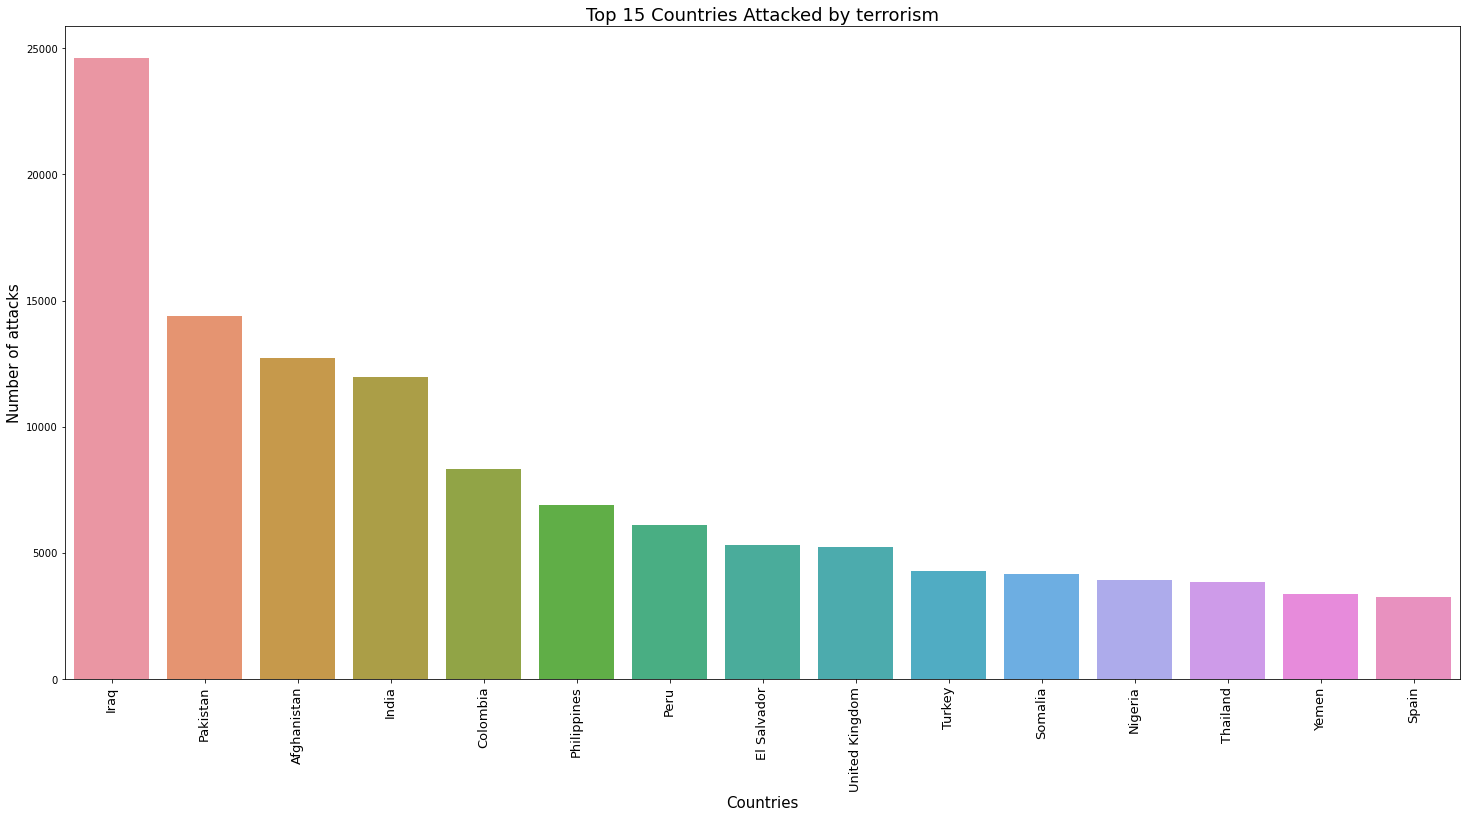

In [25]:
plt.subplots(figsize=(25,12))
sns.barplot(highest_countries.index, highest_countries.values)
plt.title('Top 15 Countries Attacked by terrorism',fontsize = 18)
plt.xlabel('Countries',fontsize = 15)
plt.ylabel('Number of attacks',fontsize=15)
plt.xticks(rotation='vertical',fontsize=13)
plt.show()

In [26]:
# Total Number of people killed in terror attack
kill = df.loc[:,'nkill']
sortedKill = kill.astype(int).sort_values(ascending = False)
print(sortedKill)
print('Total Number of people killed by terror attack:', int(sum(kill)))

133518    1570
73126     1384
73127     1383
55934     1180
136283     953
          ... 
110236       0
44062        0
44063        0
110233       0
181690       0
Name: nkill, Length: 181691, dtype: int32
Total Number of people killed by terror attack: 411868


In [27]:
countries = df.loc[:,'country_txt']
killing = df.loc[:,'nkill']

countryKillData = pd.concat([countries, killing], axis=1)
countryvsKill = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryvsKill

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [28]:
labels = countryvsKill.columns.tolist()
labels = labels[:50] 
index = np.arange(len(labels))
values = countryvsKill.T.values.tolist()
values = values[:50]

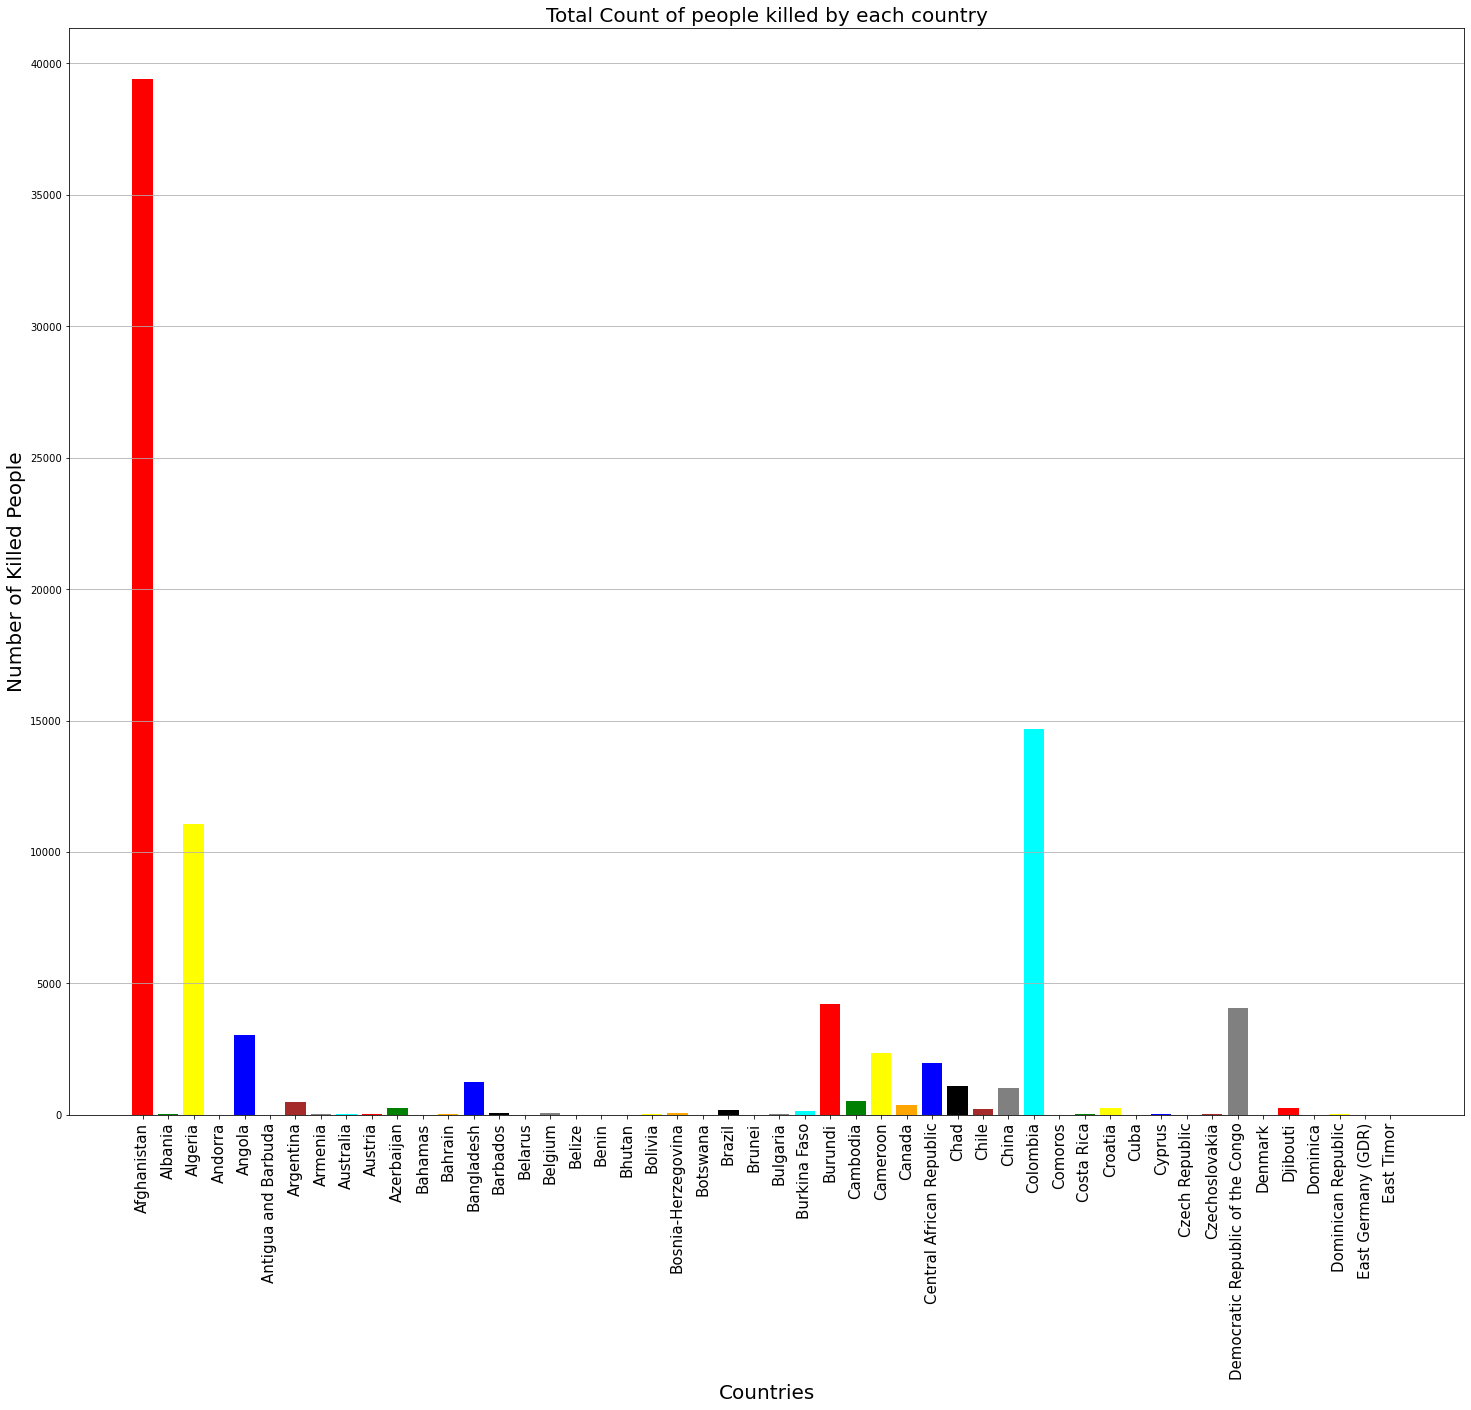

In [29]:

#Integer type of values
values = [int(i[0]) for i in values] 
colors = ['red', 'green', 'yellow','orange','blue', 'black','brown', 'gray', 'cyan'] 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
plt.rcParams["figure.figsize"] = (25,20)
plt.bar(index, values, color = colors)
plt.xlabel('Countries', fontsize = 20)
plt.ylabel('Number of Killed People', fontsize = 20)
plt.xticks(index, labels, fontsize = 15, rotation='vertical')
plt.title('Total Count of people killed by each country', fontsize = 20)

plt.show()

In [30]:
labels = countryvsKill.columns.tolist()
labels = labels[51:100] 
index = np.arange(len(labels))
values = countryvsKill.T.values.tolist()
values = values[51:100]

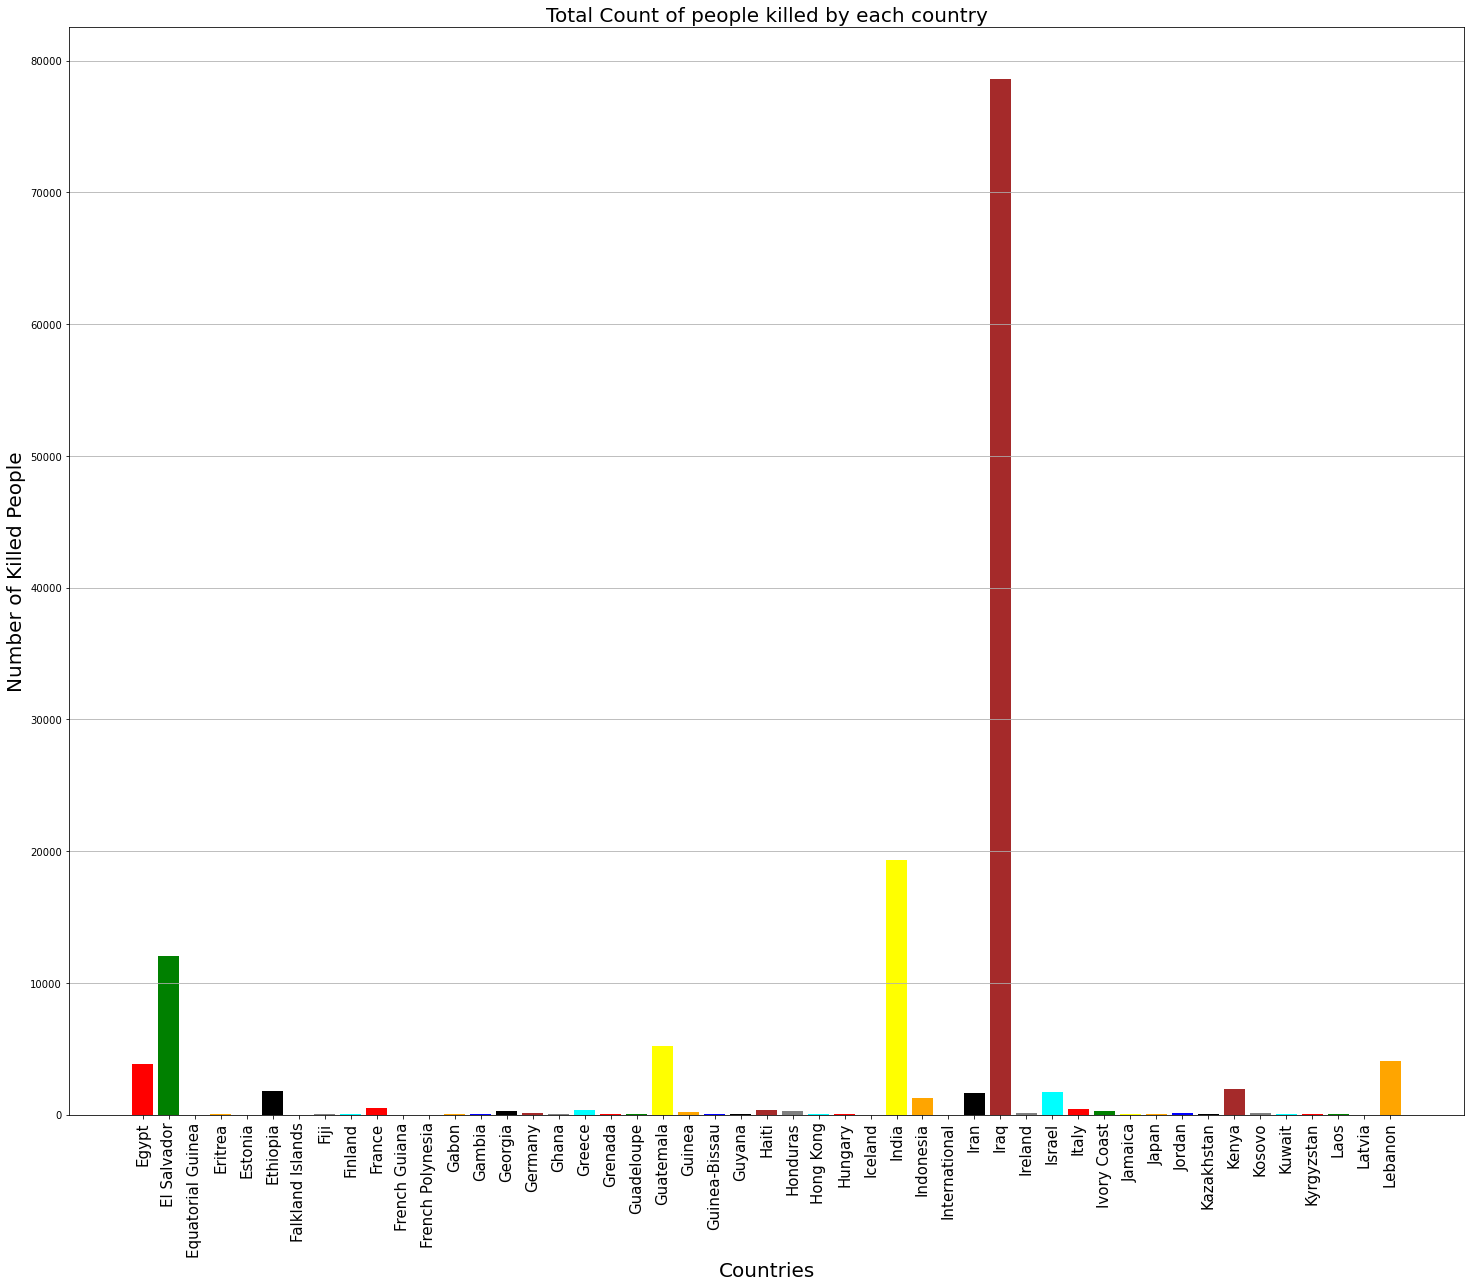

In [31]:
#Integer type of values
values = [int(i[0]) for i in values] 
colors = ['red', 'green', 'yellow','orange','blue', 'black','brown', 'gray', 'cyan'] 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
plt.rcParams["figure.figsize"] = (25,20)
plt.bar(index, values, color = colors)
plt.xlabel('Countries', fontsize = 20)
plt.ylabel('Number of Killed People', fontsize = 20)
plt.xticks(index, labels, fontsize = 15, rotation='vertical')
plt.title('Total Count of people killed by each country', fontsize = 20)

plt.show()

In [32]:
labels = countryvsKill.columns.tolist()
labels = labels[101:150] 
index = np.arange(len(labels))
values = countryvsKill.T.values.tolist()
values = values[101:150]

Text(0.5, 1.0, 'Total Count of people killed by each country')

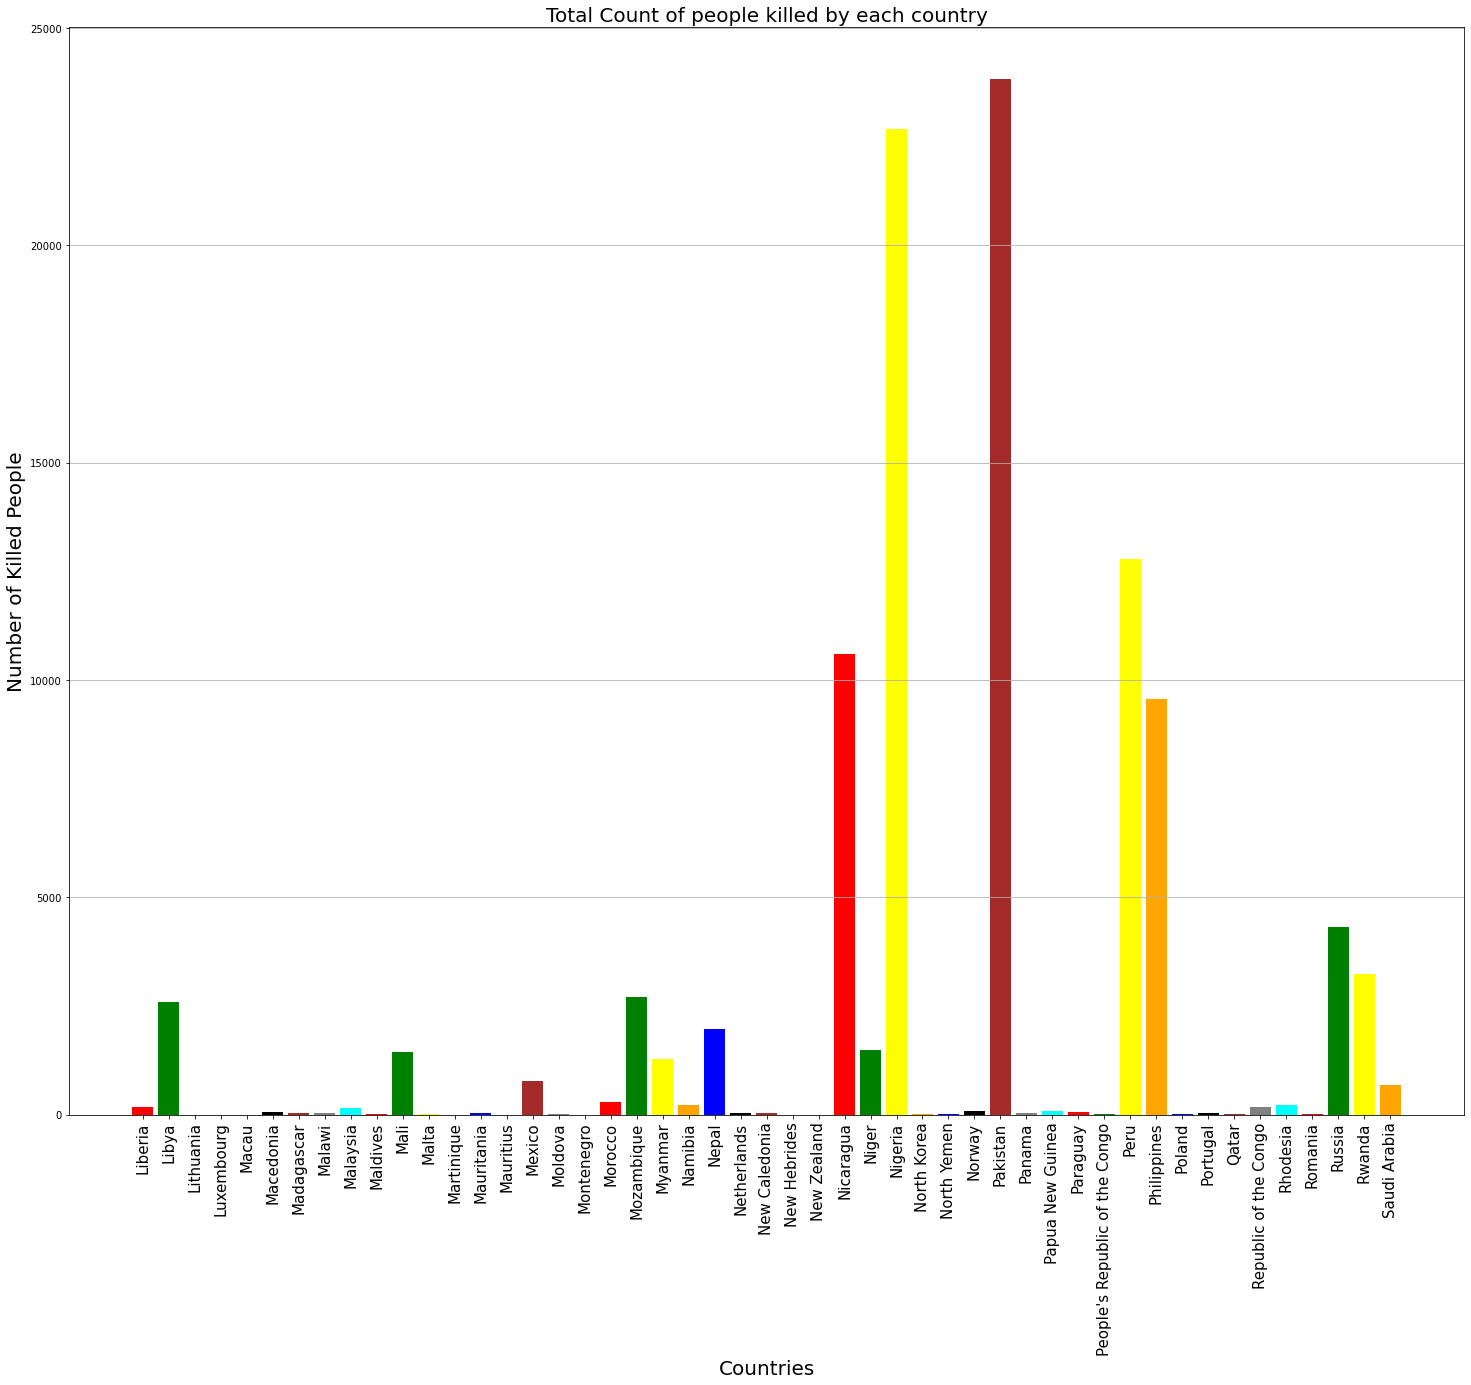

In [33]:
#Integer type of values
values = [int(i[0]) for i in values] 
colors = ['red', 'green', 'yellow','orange','blue', 'black','brown', 'gray', 'cyan'] 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
plt.rcParams["figure.figsize"] = (25,20)
plt.bar(index, values, color = colors)
plt.xlabel('Countries', fontsize = 20)
plt.ylabel('Number of Killed People', fontsize = 20)
plt.xticks(index, labels, fontsize = 15, rotation='vertical')
plt.title('Total Count of people killed by each country', fontsize = 20)

In [34]:
labels = countryvsKill.columns.tolist()
labels = labels[151:205] 
index = np.arange(len(labels))
values = countryvsKill.T.values.tolist()
values = values[151:205]

Text(0.5, 1.0, 'Total Count of people killed by each country')

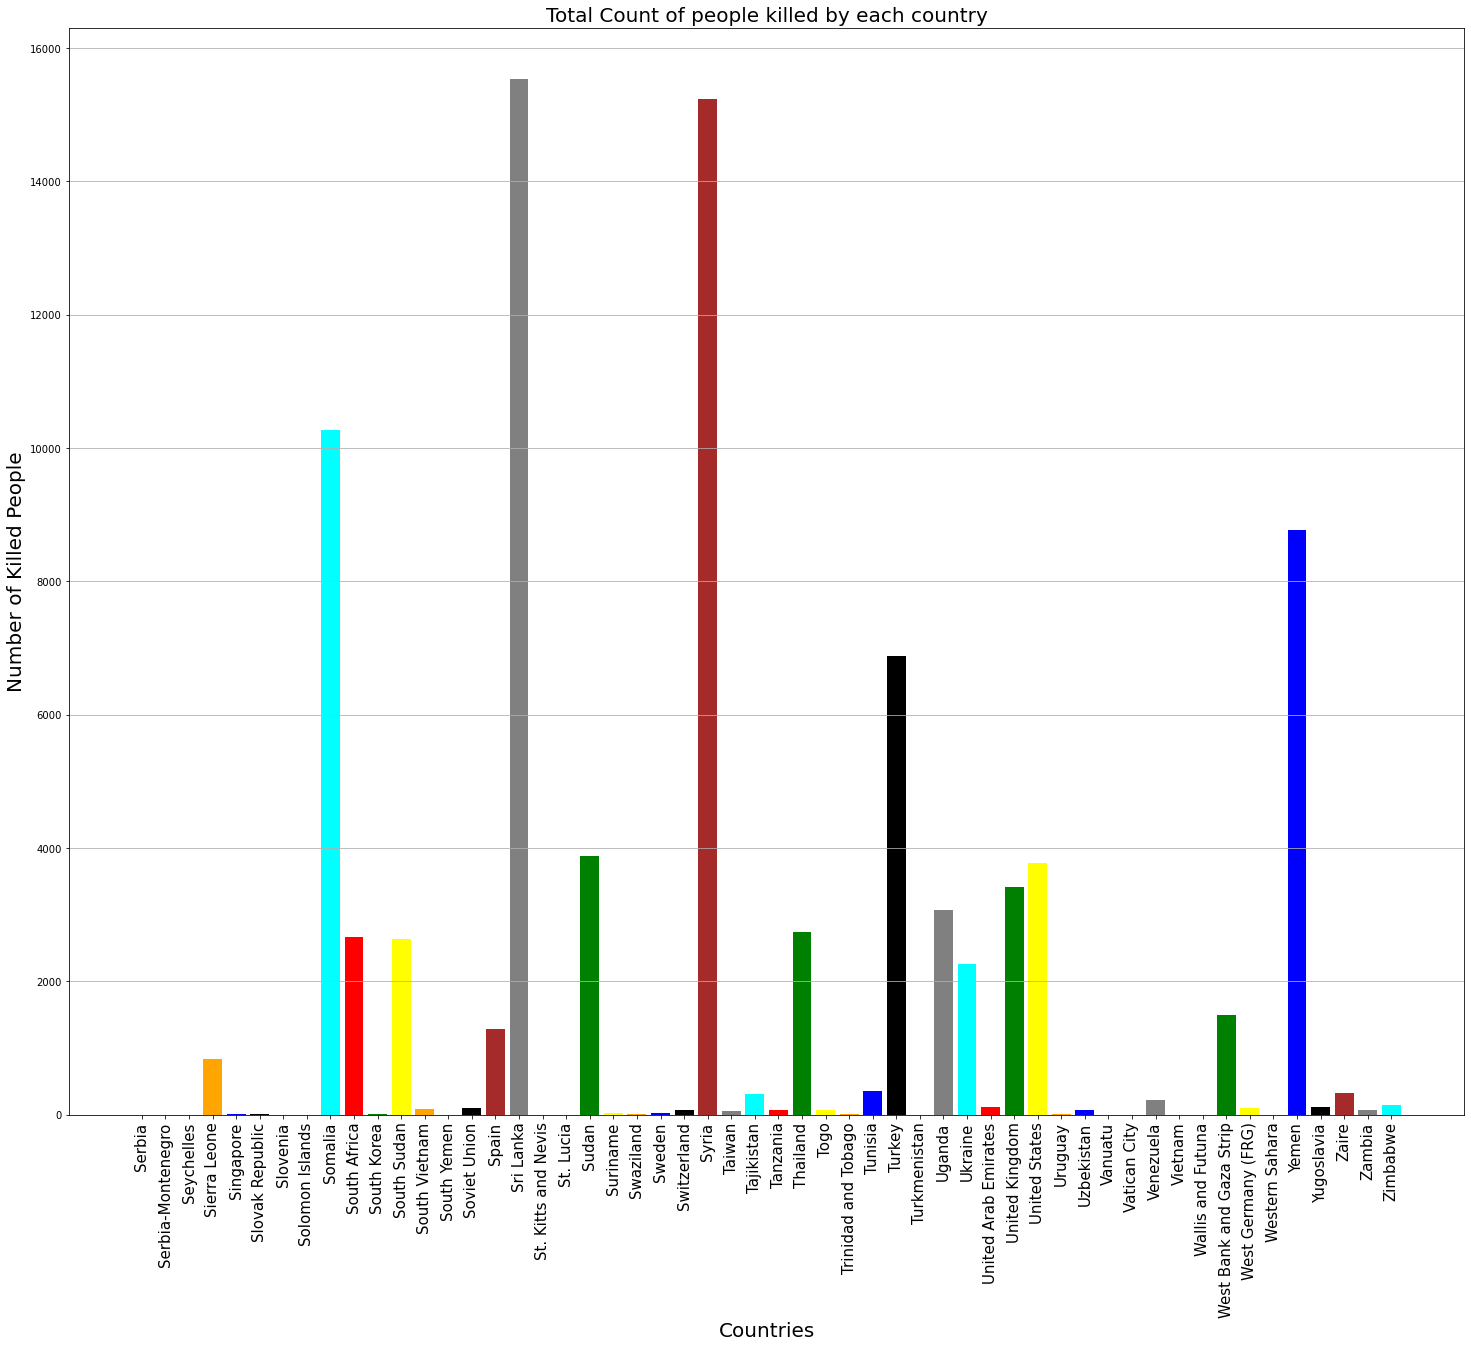

In [35]:
#Integer type of values
values = [int(i[0]) for i in values] 
colors = ['red', 'green', 'yellow','orange','blue', 'black','brown', 'gray', 'cyan'] 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
plt.rcParams["figure.figsize"] = (25,20)
plt.bar(index, values, color = colors)
plt.xlabel('Countries', fontsize = 20)
plt.ylabel('Number of Killed People', fontsize = 20)
plt.xticks(index, labels, fontsize = 15, rotation='vertical')
plt.title('Total Count of people killed by each country', fontsize = 20)